<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>1D ConvNet on Sentiment Analysis</H1></u></center>

# First run this from terminal

In [376]:
# import nltk
# nltk.download('stopwords')

In [377]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [378]:
#import time
#start_time = time.time()
import pandas as pd
import numpy as np

In [379]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

In [380]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, Embedding, LSTM, CuDNNLSTM, Dropout, Flatten, Input
from keras.datasets import imdb

In [381]:
num_words = 50000

In [382]:
# def load_data(path='imdb.npz', num_words=None, skip_top=0,
#               maxlen=None, seed=113,
#               start_char=1, oov_char=2, index_from=3, **kwargs):

#     with np.load(path) as f:
#         x_train, labels_train = f['x_train'], f['y_train']
#         x_test, labels_test = f['x_test'], f['y_test']

#     np.random.seed(seed)
#     indices = np.arange(len(x_train))
#     np.random.shuffle(indices)
#     x_train = x_train[indices]
#     labels_train = labels_train[indices]

#     indices = np.arange(len(x_test))
#     np.random.shuffle(indices)
#     x_test = x_test[indices]
#     labels_test = labels_test[indices]

#     xs = np.concatenate([x_train, x_test])
#     labels = np.concatenate([labels_train, labels_test])

#     if start_char is not None:
#         xs = [[start_char] + [w + index_from for w in x] for x in xs]
#     elif index_from:
#         xs = [[w + index_from for w in x] for x in xs]

#     if maxlen:
#         xs, labels = _remove_long_seq(maxlen, xs, labels)
#         if not xs:
#             raise ValueError('After filtering for sequences shorter than maxlen=' +
#                              str(maxlen) + ', no sequence was kept. '
#                              'Increase maxlen.')
#     if not num_words:
#         num_words = max([max(x) for x in xs])

#     if oov_char is not None:
#         xs = [[w if (skip_top <= w < num_words) else oov_char for w in x]
#               for x in xs]
#     else:
#         xs = [[w for w in x if skip_top <= w < num_words]
#               for x in xs]

#     idx = len(x_train)
#     x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
#     x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])

#     return (x_train, y_train), (x_test, y_test)

In [383]:
#(train_data, train_labels), (test_data, test_labels) = load_data(path='imdb.npz',num_words=10000)

In [384]:
# (X_train, y_train), (X_test, y_test) = load_data(path='imdb.npz',num_words=10000)

In [385]:
df = pd.read_csv('Reviews_2.csv')

In [386]:
df.columns

Index(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Summary',
       'Text'],
      dtype='object')

In [387]:
df = df[['Text','Score']]

In [388]:
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [389]:
len(df)

568454

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
Text     568454 non-null object
Score    568454 non-null int64
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [391]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [392]:
df['Score'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Reviews', 
                                                                title='Number reviews in each rating')

## Down-sampling the data

In [393]:
# # Using Ramdom Under Sampling (RUS) technique
# X = df.iloc[:, :1].values
# y = df.loc[:, 'Score'].values

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(return_indices=True)
# X_rus, y_rus, id_rus = rus.fit_sample(X, y)

In [394]:
# X_rus[:,0]

In [395]:
#y_rus[:,1]

In [396]:
# X_rus.shape

In [397]:
# X_rus[10]

In [398]:
# len(X)

In [399]:
# len(X_rus)

In [400]:
# id_rus

In [401]:
# X_rus = X_rus[:,0]

In [402]:
# X_rus.shape

In [403]:
# y_rus

In [404]:
# y_rus.shape

In [405]:
##y_rus = y_rus[:,0]

In [406]:
# df = pd.DataFrame({'Text':X_rus,'Score':y_rus})

## df = pd.DataFrame({'x':x, 'y':y})

In [407]:
# df['Text'][1]

In [408]:
def print_plot(index):
    example = df[df.index == index][['Text', 'Score']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Score:', example[1])

In [409]:
print_plot(10)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!
Score: 5


In [410]:
print_plot(100)

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.
Score: 5


In [411]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Text'] = df['Text'].apply(clean_text)

In [412]:
df['Text'] = df['Text'].str.replace('\d+', '')

In [413]:
print_plot(10)

dont know cactus tequila unique combination ingredients flavour hot sauce makes one kind picked bottle trip brought back home us totally blown away realized simply couldnt find anywhere city bummedbr br magic internet case sauce ecstatic itbr br love hot saucei mean really love hot sauce dont want sauce tastelessly burns throat grab bottle tequila picante gourmet de inclan realize taste never want use saucebr br thank personal incredible service
Score: 5


In [414]:
print_plot(100)

mouth says love thee let count waysbr like apple products must item draw back shipping cost heavy
Score: 5


# ==================================

## Test- only first 5000 observations

In [415]:
len(df)

568454

In [416]:
df.head()

,Text,Score
0,bought several vitality canned dog food produc...,5
1,product arrived labeled jumbo salted peanutsth...,1
2,confection around centuries light pillowy citr...,4
3,looking secret ingredient robitussin believe f...,2
4,great taffy great price wide assortment yummy ...,5


# Shuffle the dataframe index, inplace

In [417]:
# df = df.sample(frac=1).reset_index(drop=True)

In [418]:
#df = df[:5000]

In [419]:
df.head()

,Text,Score
0,bought several vitality canned dog food produc...,5
1,product arrived labeled jumbo salted peanutsth...,1
2,confection around centuries light pillowy citr...,4
3,looking secret ingredient robitussin believe f...,2
4,great taffy great price wide assortment yummy ...,5


In [420]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

# ====================================

In [421]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 150
# This is fixed.
EMBEDDING_DIM = 50

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 199055 unique tokens.


In [422]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (568454, 150)


In [423]:
Y = pd.get_dummies(df['Score']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (568454, 5)


In [424]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(511608, 150) (511608, 5)
(56846, 150) (56846, 5)


# finished data preprocessing

# ====================================================================

# start building CNN 

In [425]:
print(len(X_train), 'train_data')
print(len(X_test), 'test_data')

511608 train_data
56846 test_data


In [426]:
#(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

In [427]:
max_len = 256
embedding_size = 50
batch_size = 128

## Sequences per time

In [428]:
print(X_train[2])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     7   409  4197     3  3989  1346   110
     7  2488    31 34488     1    60]


In [429]:
len(X_train[1])

150

In [430]:
pad  =  'post' #'pre'
#Convert our lists to equal length sequences
X_train_pad = pad_sequences(X_train, maxlen=max_len, padding=pad, truncating=pad)
X_test_pad = pad_sequences(X_test, maxlen=max_len, padding=pad, truncating=pad)

In [431]:
X_train_pad.shape

(511608, 256)

In [432]:
X_train_pad[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,   209,  1487,     1,     8,  7478,    31,     1,  1094,
       10317,     1,     4,   329, 12034,   323,     1,   820, 24017,
        9944,     1,

In [433]:
X_train_pad[4499]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
          45,    42,   439,   192,    43,   642,   461,   766,    45,
          86,    47,  1665,    39,   965,  9159,  5853,   313,   259,
         993,   965,  1761,  4133, 15835,   582,  6476,  2397,    60,
       16919,    15,

In [434]:
#print("--- %s seconds ---" % (time.time() - start_time))

## Creating the model (Model 0):

In [435]:
model0 = Sequential()

In [436]:
model0.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_len,
                    name='layer_embedding'))

In [437]:
model0.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))

In [438]:
model0.add(MaxPooling1D(pool_size=5))

In [439]:
model0.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))

In [440]:
model0.add(MaxPooling1D(pool_size=5))

In [441]:
model0.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))

In [442]:
model0.add(MaxPooling1D(pool_size=5))

In [443]:
model0.add(Dropout(0.2))

In [444]:
model0.add(Flatten())

In [445]:
model0.add(Dense(250, activation='relu'))

In [446]:
#model0.add(Dense(5, activation='softmax', name='classification'))

model0.add(Dense(5, activation='softmax'))

## Compiling the model:

In [447]:
model0.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [448]:
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 256, 50)           2500000   
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 256, 128)          32128     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 51, 128)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 51, 128)           82048     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 10, 128)           82048     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 2, 128)            0         
__________

## Training

In [449]:
% matplotlib inline

In [450]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
# Train the model but not plot the train-validation graphs
# #%%time
# model0.fit(X_train_pad, Y_train, validation_split=0.2222, epochs=7, batch_size=batch_size)

Training Accuracy: 0.8580
Testing Accuracy:  0.7820


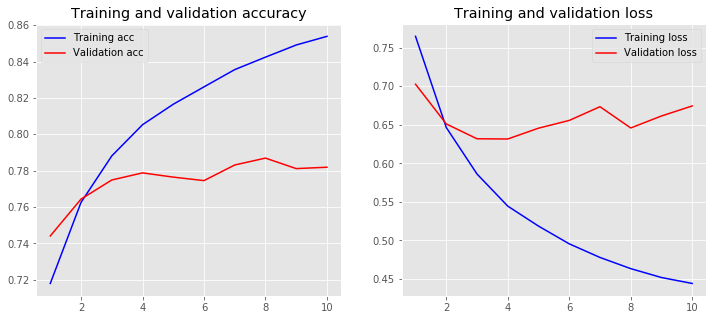

In [451]:
# #%%time
# model0.fit(X_train_pad, Y_train, validation_split=0.2222, epochs=7, batch_size=batch_size)


# Train the model and also plot the train-validation graphs

history = model0.fit(X_train_pad, Y_train,
                    epochs=10,
                    verbose=False,
                    validation_split=0.2222,
                    batch_size=batch_size)
loss, accuracy = model0.evaluate(X_train_pad, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model0.evaluate(X_test_pad, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


## Testing

In [453]:
#%%time
eval_ = model0.evaluate(X_test_pad, Y_test)

56846/56846 [==============================] - 13s 222us/step


In [454]:
print("Loss: {0:.5}".format(eval_[0]))
print("Accuracy: {0:.2%}".format(eval_[1]))

Loss: 0.66858
Accuracy: 78.20%


In [171]:
# history = model.fit(X_train, y_train,
#                     epochs=10,
#                     verbose=False,
#                     validation_data=(X_test, y_test),
#                     batch_size=10)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))
# plot_history(history)

# ===============================================

# Now show the F-1 score and Accuracy

In [172]:
accr = model0.evaluate(X_test_pad,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))



56846/56846 [==============================] - 13s 224us/step
Test set
  Loss: 0.692
  Accuracy: 0.780


In [173]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [174]:
def decode(datum):
    return np.argmax(datum)

In [175]:
# for i in range(Y_test.shape[0]):
#     datum = Y_test[i]
#     print('index: %d' % i)
#     print('encoded datum: %s' % datum)
#     decoded_datum = decode(Y_test[i])
#     print('decoded datum: %s' % decoded_datum)
#     print()

In [176]:
Y_test = np.array([decode(i) for i in Y_test])

In [177]:
yhat_probs = model0.predict(X_test_pad, verbose=0)
# predict crisp classes for test set
yhat_classes = model0.predict_classes(X_test_pad, verbose=0)

In [178]:
yhat_classes

array([4, 4, 2, ..., 0, 0, 1])

In [179]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.780407


In [180]:
f1_score(Y_test, yhat_classes, average='macro') 

0.5834867546429201

In [181]:
f1_score(Y_test, yhat_classes, average='micro') 

0.7804067128733772

In [182]:
f1_score(Y_test, yhat_classes, average=None) 

array([0.70147728, 0.42211677, 0.45546619, 0.44965753, 0.88871599])

In [183]:
f1_score(Y_test, yhat_classes, average='weighted') 

0.7536501139287962

In [184]:
unique_elements, counts_elements = np.unique(Y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1     2     3     4]
 [ 5179  2904  4267  7982 36514]]


In [185]:
unique_elements, counts_elements = np.unique(yhat_classes, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1     2     3     4]
 [ 5584  1943  2447  3698 43174]]


In [186]:
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)

[[ 3775   294   101    36   973]
 [  888  1023   268    58   667]
 [  437   448  1529   424  1429]
 [  171   109   381  2626  4695]
 [  313    69   168   554 35410]]


# ==================================

## Model 1:

In [90]:
model1 = Sequential()

In [91]:
model1.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_len,
                    name='layer_embedding'))

In [92]:
model1.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))

In [93]:
model1.add(MaxPooling1D(pool_size=3))

In [94]:
model1.add(CuDNNLSTM(128))

In [95]:
model1.add(Dropout(0.5))

In [96]:
model1.add(Dense(1, activation='sigmoid', name='classification'))

## Compiling the model:

In [97]:
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 256, 50)           1000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 256, 128)          32128     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 85, 128)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
classification (Dense)       (None, 1)                 129       
Total params: 1,164,353
Trainable params: 1,164,353
Non-trainable params: 0
_________________________________________________________________


## Training the model:

In [43]:
%%time
model1.fit(X_train_pad, y_train, validation_split=0.05, epochs=10, batch_size=batch_size)

Train on 23750 samples, validate on 1250 samples
Epoch 1/10


InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[{{node cu_dnnlstm_1/CudnnRNN}} = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="lstm", seed=87654321, seed2=0](cu_dnnlstm_1/transpose, cu_dnnlstm_1/ExpandDims_1, cu_dnnlstm_1/ExpandDims_2, cu_dnnlstm_1/concat_1)]]

Caused by op 'cu_dnnlstm_1/CudnnRNN', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-32d0f9be83b0>", line 1, in <module>
    model1.add(CuDNNLSTM(128))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/sequential.py", line 181, in add
    output_tensor = layer(self.outputs[0])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/recurrent.py", line 532, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 90, in call
    output, states = self._process_batch(inputs, initial_state)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 517, in _process_batch
    is_training=True)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1544, in __call__
    input_data, input_h, input_c, params, is_training=is_training)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1435, in __call__
    seed=self._seed)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 922, in _cudnn_rnn
    outputs, output_h, output_c, _ = gen_cudnn_rnn_ops.cudnn_rnn(**args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/gen_cudnn_rnn_ops.py", line 116, in cudnn_rnn
    is_training=is_training, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'CudnnRNN' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[{{node cu_dnnlstm_1/CudnnRNN}} = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="lstm", seed=87654321, seed2=0](cu_dnnlstm_1/transpose, cu_dnnlstm_1/ExpandDims_1, cu_dnnlstm_1/ExpandDims_2, cu_dnnlstm_1/concat_1)]]


## Testing the model:

In [44]:
%%time
eval_ = model1.evaluate(X_test_pad, y_test)

InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[{{node cu_dnnlstm_1/CudnnRNN}} = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="lstm", seed=87654321, seed2=0](cu_dnnlstm_1/transpose, cu_dnnlstm_1/ExpandDims_1, cu_dnnlstm_1/ExpandDims_2, cu_dnnlstm_1/concat_1)]]

Caused by op 'cu_dnnlstm_1/CudnnRNN', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-32d0f9be83b0>", line 1, in <module>
    model1.add(CuDNNLSTM(128))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/sequential.py", line 181, in add
    output_tensor = layer(self.outputs[0])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/recurrent.py", line 532, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 90, in call
    output, states = self._process_batch(inputs, initial_state)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 517, in _process_batch
    is_training=True)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1544, in __call__
    input_data, input_h, input_c, params, is_training=is_training)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1435, in __call__
    seed=self._seed)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 922, in _cudnn_rnn
    outputs, output_h, output_c, _ = gen_cudnn_rnn_ops.cudnn_rnn(**args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/gen_cudnn_rnn_ops.py", line 116, in cudnn_rnn
    is_training=is_training, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'CudnnRNN' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[{{node cu_dnnlstm_1/CudnnRNN}} = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="lstm", seed=87654321, seed2=0](cu_dnnlstm_1/transpose, cu_dnnlstm_1/ExpandDims_1, cu_dnnlstm_1/ExpandDims_2, cu_dnnlstm_1/concat_1)]]


In [45]:
print("Loss: {0:.5}".format(eval_[0]))
print("Accuracy: {0:.2%}".format(eval_[1]))

Loss: 6.958
Accuracy: 56.60%


## Conv1D model with multiple kernel sizes:

In [46]:
from keras.layers import concatenate

In [47]:
conv = []
filter_sizes = [3,4,5]

In [48]:
embedding_layer = Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_len,
                    name='layer_embedding')

In [49]:
seq_input = Input(shape=(max_len,), dtype='int32')
embed_seq = embedding_layer(seq_input)

for f in filter_sizes:
    _conv = Conv1D(filters=128,kernel_size=f,activation='relu')(embed_seq)
    _pool = MaxPooling1D(5)(_conv)
    conv.append(_pool)

In [50]:
_concat = concatenate(conv, axis=1)
_conv1= Conv1D(128, 5, activation='relu')(_concat)
_pool1 = MaxPooling1D(5)(_conv1)
_pool1 = Dropout(0.5)(_pool1)
_conv2 = Conv1D(128, 5, activation='relu')(_pool1)
_pool2 = MaxPooling1D(5)(_conv2)
_flat = Flatten()(_pool2)
_flat = Dropout(0.5)(_flat)
_dense = Dense(128, activation='relu')(_flat)
preds = Dense(1, activation='sigmoid')(_dense)

In [51]:
model = Model(seq_input, preds)

In [52]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256)          0                                            
__________________________________________________________________________________________________
layer_embedding (Embedding)     (None, 256, 50)      1000000     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 254, 128)     19328       layer_embedding[0][0]            
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 253, 128)     25728       layer_embedding[0][0]            
__________________________________________________________________________________________________
conv1d_7 (

In [53]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [54]:
%%time
model.fit(X_train_pad, y_train, validation_split=0.05, epochs=10, batch_size=batch_size)

Train on 23750 samples, validate on 1250 samples
Epoch 1/10


InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[{{node cu_dnnlstm_1/CudnnRNN}} = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="lstm", seed=87654321, seed2=0](cu_dnnlstm_1/transpose, cu_dnnlstm_1/ExpandDims_1, cu_dnnlstm_1/ExpandDims_2, cu_dnnlstm_1/concat_1)]]

Caused by op 'cu_dnnlstm_1/CudnnRNN', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-32d0f9be83b0>", line 1, in <module>
    model1.add(CuDNNLSTM(128))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/sequential.py", line 181, in add
    output_tensor = layer(self.outputs[0])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/recurrent.py", line 532, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 90, in call
    output, states = self._process_batch(inputs, initial_state)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 517, in _process_batch
    is_training=True)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1544, in __call__
    input_data, input_h, input_c, params, is_training=is_training)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1435, in __call__
    seed=self._seed)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 922, in _cudnn_rnn
    outputs, output_h, output_c, _ = gen_cudnn_rnn_ops.cudnn_rnn(**args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/gen_cudnn_rnn_ops.py", line 116, in cudnn_rnn
    is_training=is_training, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'CudnnRNN' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[{{node cu_dnnlstm_1/CudnnRNN}} = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="lstm", seed=87654321, seed2=0](cu_dnnlstm_1/transpose, cu_dnnlstm_1/ExpandDims_1, cu_dnnlstm_1/ExpandDims_2, cu_dnnlstm_1/concat_1)]]


In [55]:
%%time
eval_ = model.evaluate(X_test_pad, y_test)

InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[{{node cu_dnnlstm_1/CudnnRNN}} = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="lstm", seed=87654321, seed2=0](cu_dnnlstm_1/transpose, cu_dnnlstm_1/ExpandDims_1, cu_dnnlstm_1/ExpandDims_2, cu_dnnlstm_1/concat_1)]]

Caused by op 'cu_dnnlstm_1/CudnnRNN', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-32d0f9be83b0>", line 1, in <module>
    model1.add(CuDNNLSTM(128))
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/sequential.py", line 181, in add
    output_tensor = layer(self.outputs[0])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/recurrent.py", line 532, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 90, in call
    output, states = self._process_batch(inputs, initial_state)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 517, in _process_batch
    is_training=True)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1544, in __call__
    input_data, input_h, input_c, params, is_training=is_training)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1435, in __call__
    seed=self._seed)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 922, in _cudnn_rnn
    outputs, output_h, output_c, _ = gen_cudnn_rnn_ops.cudnn_rnn(**args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/gen_cudnn_rnn_ops.py", line 116, in cudnn_rnn
    is_training=is_training, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'CudnnRNN' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[{{node cu_dnnlstm_1/CudnnRNN}} = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="lstm", seed=87654321, seed2=0](cu_dnnlstm_1/transpose, cu_dnnlstm_1/ExpandDims_1, cu_dnnlstm_1/ExpandDims_2, cu_dnnlstm_1/concat_1)]]


In [56]:
print("Loss: {0:.5}".format(eval_[0]))
print("Accuracy: {0:.2%}".format(eval_[1]))

Loss: 6.958
Accuracy: 56.60%


In [ ]:
#print("Total time used....")
#print("--- %s seconds ---" % (time.time() - start_time))

## Reference:

https://keras.io/layers/convolutional/